# Drowsiness & Age Detection 

### we are installing the Pytorch1.8.1+cu111 for better performance  

In [ ]:

!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

### Cloning yolo5 our main data structure 

In [ ]:
!git clone https://github.com/ultralytics/yolov5

### Need to install the requirements for the envirement that has not ran yolo5 before 

In [ ]:
!cd yolov5 & pip install -r requirements.txt

### Importing the necessary libraries for our project

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\Public\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### loading yoylo5s (small) the fastest yolo5

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Ali Kian/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-10 Python-3.9.15 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
# printing the model
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
# testing an image and passing it to our model to get the result
img = 'freeway.png'

In [4]:
results = model(img)
results.print()

image 1/1: 178x283 17 cars, 12 trucks
Speed: 17.0ms pre-process, 14.0ms inference, 8.5ms NMS per image at shape (1, 3, 416, 640)


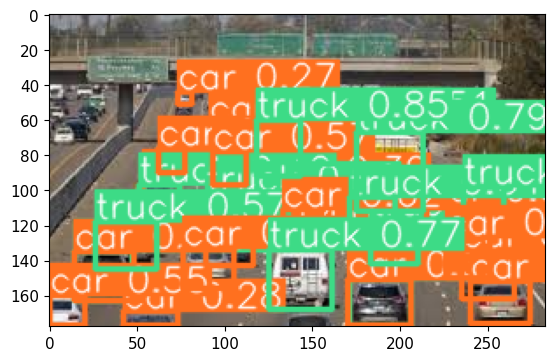

In [5]:
# we can see the image with the rendered image
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

### Lets look at the plain model with 80 classes 

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() 
    # Make detections 
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
import uuid   # Unique identifier
import os
import time

In [9]:
# here we will add images to the yolo data set our own pictures of awake or
# drowsyness
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
# with more images the model will be better
number_imgs = 20

   ### in this block, we open the camera to capture our images for the data set

In [10]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

### cloning the lableImg to do our labeling for our images

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

### After doing the anotations we are ready to train our model with our own data sets

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


### now we are loading our model from our best run 

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Ali Kian/.cache\torch\hub\master.zip
YOLOv5  2022-12-10 Python-3.9.15 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


##### Testing our model with a pic

In [12]:
img = os.path.join('data', 'images', 'awake.8f08827f-714d-11ed-a0cc-b06ebfba7cdb.jpg')

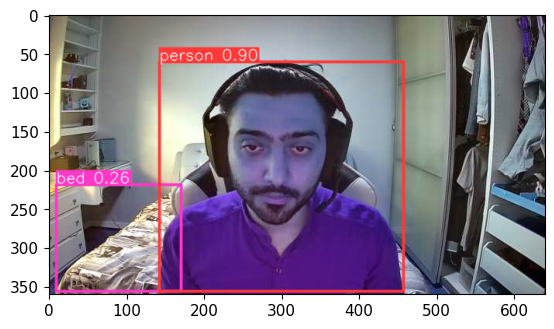

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


# Loading Face Detection and Age Detection

In [5]:
import cv2
import os
import filetype
import numpy as np
AGE_MODEL = 'weights/deploy_age.prototxt'
AGE_PROTO = 'weights/age_net.caffemodel'
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
AGE_INTERVALS = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)',
                 '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
FACE_PROTO = "weights/deploy.prototxt.txt"

FACE_MODEL = "weights/res10_300x300_ssd_iter_140000_fp16.caffemodel"
frame_width = 1280
frame_height = 720
face_net = cv2.dnn.readNetFromCaffe(FACE_PROTO, FACE_MODEL)
age_net = cv2.dnn.readNetFromCaffe(AGE_MODEL, AGE_PROTO)


In [6]:
def get_faces(frame, confidence_threshold=0.5):
    """Returns the box coordinates of all detected faces"""
    # convert the frame into a blob to be ready for NN input
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104, 177.0, 123.0))
    # set the image as input to the NN
    face_net.setInput(blob)
    # perform inference and get predictions
    output = np.squeeze(face_net.forward())
    # initialize the result list
    faces = []
    # Loop over the faces detected
    for i in range(output.shape[0]):
        confidence = output[i, 2]
        if confidence > confidence_threshold:
            box = output[i, 3:7] * np.array([frame_width, frame_height, frame_width, frame_height])
            # convert to integers
            start_x, start_y, end_x, end_y = box.astype(np.int)
            # widen the box a little
            start_x, start_y, end_x, end_y = start_x - \
                10, start_y - 10, end_x + 10, end_y + 10
            start_x = 0 if start_x < 0 else start_x
            start_y = 0 if start_y < 0 else start_y
            end_x = 0 if end_x < 0 else end_x
            end_y = 0 if end_y < 0 else end_y
            # append to our list
            faces.append((start_x, start_y, end_x, end_y))
    return faces

In [7]:
def get_optimal_font_scale(text, width):
    """Determine the optimal font scale based on the hosting frame width"""
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1

# from: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    return cv2.resize(image, dim, interpolation = inter)

In [8]:
def predict_age(input_path: str):
    """Predict the age of the faces showing in the image"""
    # Read Input Image
    img = cv2.imread(input_path)
    # Take a copy of the initial image and resize it
    frame = img.copy()
    if frame.shape[1] > frame_width:
        frame = image_resize(frame, width=frame_width)
    faces = get_faces(frame)
    for i, (start_x, start_y, end_x, end_y) in enumerate(faces):
        face_img = frame[start_y: end_y, start_x: end_x]
        # image --> Input image to preprocess before passing it through our dnn for classification.
        blob = cv2.dnn.blobFromImage(image=face_img, scalefactor=1.0, size=(227, 227), mean=MODEL_MEAN_VALUES, swapRB=False)
        # Predict Age
        age_net.setInput(blob)
        age_preds = age_net.forward()
#         print("="*30, f"Face {i+1} Prediction Probabilities", "="*30)
#         for i in range(age_preds[0].shape[0]):
#             print(f"{AGE_INTERVALS[i]}: {age_preds[0, i]*100:.2f}%")
        i = age_preds[0].argmax()
        age = AGE_INTERVALS[i]
        age_confidence_score = age_preds[0][i]
        # Draw the box
        mylabel = f"Age:{age} - {age_confidence_score*100:.2f}%"
#         print(label)      
    return frame, mylabel


In [9]:
def display_img(title, img):
    """Displays an image on screen and maintains the output until the user presses a key"""
    # Display Image on screen
    cv2.imshow(title, img)
    # Mantain output until user presses a key
    cv2.waitKey(0)
    # Destroy windows when user presses a key
    cv2.destroyAllWindows()

### using google and pygames to play our own custom alert message

In [10]:
import speech_recognition as sr
from gtts import gTTS
import os
import time
import playsound

In [11]:
# This is to create a MP3 using google translate to alert the driver
def speak(text):
    tts = gTTS(text=text, lang='en')
    filename = 'voice.mp3'
    tts.save(filename)
    playsound.playsound('voice.mp3')
#     os.remove("voice.mp3")


In [ ]:
# This is the message we will make (we can change it later if we want)
speak("Alert get up")

In [12]:
from pygame import mixer
import time
def alertdriver():
    mixer.init() #Initialzing pyamge mixer
    mixer.music.load('voice.mp3') #Loading Music File
    mixer.music.play() #Playing Music with Pygame
    time.sleep(.9)
    mixer.music.stop()

In [13]:
alertdriver()

In [31]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Make detections 
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release() 
cv2.destroyAllWindows()

In [15]:
import warnings
warnings.filterwarnings("ignore")
IMAGES_PATH2=os.path.join('Age', 'images') 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    # Make detections 
    cv2.imshow('YOLO', np.squeeze(results.render()))
    alert = str(results)
    if 'drowsy' in alert:
        alertdriver()
# pres a to show the prediction of the age in persetage 
    if cv2.waitKey(10) & 0xFF == ord('a'):
        imgname = os.path.join(IMAGES_PATH2+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        predict,mylabel = predict_age(imgname)
        print(mylabel)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Age:(25, 32) - 89.22%
Age:(25, 32) - 78.97%
Age:(25, 32) - 84.02%
